<a href="https://colab.research.google.com/github/srilamaiti/SM_MIDS_W207_HW/blob/main/image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Install Augmentor
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
# Install albumentations
!pip install -U albumentations --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 22.4 MB/s 


In [39]:
# Install torchvision
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
# Install imgaug
!pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
# Install OpenCV
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
image_file = os.getcwd() + '/input/0ac436400db4.png'

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
%matplotlib inline

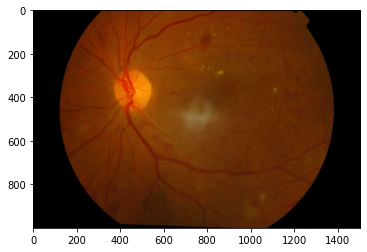

In [20]:
sample_img = Image.open(image_file, 'r')
sample_img = np.array(sample_img)
plt.imshow(sample_img);

In [10]:
# Define function to show original and transformed image side by side
def show_both_images(original, transformed):
    fig, ax = plt.subplots(1,2)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[0].set_title('Original')
    ax[1].set_title(f'Transformed')
    ax[0].imshow(original);
    ax[1].imshow(transformed);
    plt.show();

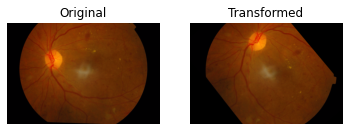

In [21]:
# Import scikit-image
from skimage import transform

# Perform 50 degrees clockwise rotation
transformed_img = transform.rotate(sample_img,
                                   angle=-50,
                                   cval=0 # Fill with black bg
                                  )

# Compare images
show_both_images(sample_img, transformed_img);

Initialised with 1 image(s) found.
Output directory set to /content/input/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1000 at 0x7F6137D67F90>: 100%|██████████| 1/1 [00:00<00:00,  1.07 Samples/s]


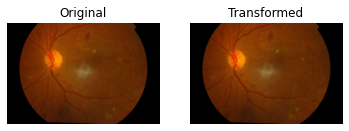

In [36]:
# Import Augmentor
import Augmentor

# Instantiate a Pipeline pointing to target input directory
p = Augmentor.Pipeline(os.getcwd() + "/input/")

# Perform horizontal flip
p.flip_left_right(probability=.3)

# We then sample (1 image) from the pipeline
num_of_samples = 1
p.sample(num_of_samples)

# Compare images
transformed_img = Image.open(image_file, 'r')
show_both_images(sample_img, transformed_img);

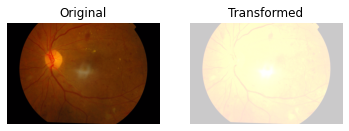

In [38]:
# Import albumentations
import albumentations as A

# Define augmentation pipeline
transform = A.Compose([
            A.RandomBrightnessContrast(p=1.0, brightness_limit=1)
            ])

# Run pipeline on original image
transformed = transform(image=sample_img)
transformed_img = transformed["image"]

# Compare images
show_both_images(sample_img, transformed_img);

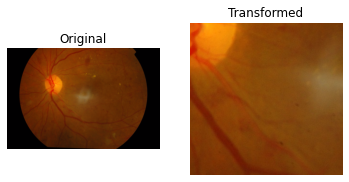

In [41]:
# Import torchvision transforms
import torchvision.transforms as T

# Define Compose transformation pipeline (with random crop)
transform = T.Compose([T.RandomCrop(size=320)
                      ])

# Set input as PIL Image format (instead of numpy_array)
sample_img_PIL = Image.open(image_file)

# Run transformation pipeline on PIL image
transformed_img = transform(sample_img_PIL) 

# Compare images
show_both_images(sample_img, transformed_img);

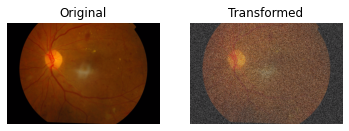

In [47]:
# Import imgaug
from imgaug import augmenters as iaa

# Define transformation (Sequential) pipeline for Gaussian noise
transform = iaa.Sequential([iaa.AdditiveGaussianNoise(scale=(20, 200))
                            ])

# Run transformation on sample image
transformed_img = transform(image=sample_img)

# Compare images
show_both_images(sample_img, transformed_img);

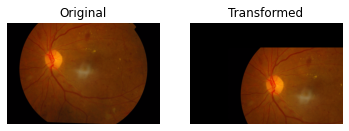

In [49]:
# Import OpenCV
import cv2

# Get height and width of the image
height, width = sample_img.shape[:2]

# Set translation parameters
quarter_height, quarter_width = height/4, width/4
  
translation_matrix = np.float32([[1, 0, quarter_width], 
                                 [0, 1, quarter_height]])
  
# Use of warpAffine to perform translation with matrix
transformed_img = cv2.warpAffine(sample_img, translation_matrix, 
                                 (width, height))

# Compare images
show_both_images(sample_img, transformed_img);